In [1]:
%matplotlib inline
# Important for using matplotlib w/ Ipython Notebook
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import matplotlib.image as mpimg
import graphviz as gv

import random
import numpy as np

import math

import sys
import os

from __future__ import division

In [2]:
MaxRange = 100
N = 50

Positive = lambda x, c: (x[0]>=c[0][0] and x[0]<=c[1][0] and x[1]>=c[0][1] and x[1]<=c[1][1])
pV = lambda: int(random.random()*(MaxRange-1)+1)
X = lambda P: [p[0] for p in P]
Y = lambda P: [p[1] for p in P]
ConceptMod =lambda C, e1, e2: [ [C[0][0]+e1+e2, C[0][1]+e1+e2], [C[1][0]+e1-e2, C[1][1]+e1-e2] ]

random.seed(55) 
Points = [(pV(), pV()) for _ in range(N)]

p1 = [int(0.2*MaxRange), int(0.2*MaxRange)]
p2 = [int(0.2*MaxRange), int(0.4*MaxRange)]
Concept = [[p1[0],p1[1]], [min(p1[0]+p2[0],MaxRange-1),min(p1[1]+p2[1],MaxRange-1)]]
print Concept

positivePoints = [ p for p in Points if Positive(p, Concept)]
negativePoints = [ p for p in Points if not Positive(p, Concept)]

[[20, 20], [40, 60]]


[(30, 35), (39, 41), (36, 21), (22, 55), (23, 56), (36, 42), (33, 53)]


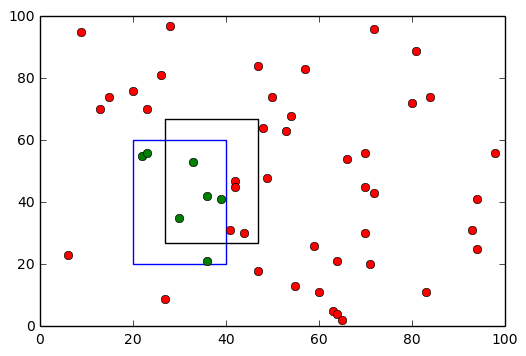

In [3]:
def DrawRect( ax, C, color='b' ): 
    rect = patches.Rectangle((C[0][0],C[0][1]),C[1][0]-C[0][0],C[1][1]-C[0][1],
                             linewidth=1,edgecolor=color,facecolor='none')
    ax.add_patch(rect)

print positivePoints
fig,ax = plt.subplots(1)
ax.set_xlim(0,MaxRange)
ax.set_ylim(0,MaxRange)
plt.plot(X(positivePoints), Y(positivePoints), 'go')
plt.plot(X(negativePoints), Y(negativePoints), 'ro')
DrawRect( ax, Concept)
DrawRect( ax, ConceptMod(Concept, 7, 0), 'k' )

plt.show()

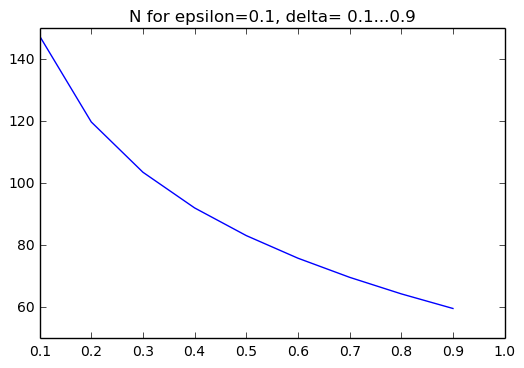

[ 147.55517816  119.82929094  103.61068662   92.10340372   83.17766167
   75.8847994    69.7187722    64.3775165    59.66619507]


In [21]:
ds = np.arange(0.1,1, 0.1)
fN = lambda e, d: (4/e)*math.log(4/d)
ns = np.array([fN(e,d) for d in ds])
plt.title("N for epsilon=0.1, delta= 0.1...0.9")
plt.plot(ds, ns, 'b-')
plt.show()
print ns